In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()

This is how maze looks like:

□ □ □ □ □
□ X □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xncs_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover chi
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg200 = XNCSConfig(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200)

XNCScfg20 = XNCSConfig(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 0
exploit = 2000

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit,
             pre_generate=True
           )

df20 = XNCSExp(maze=maze,
                   cfg=XNCScfg20,
                   number_of_tests=number_of_experiments,
                   explore_trials=explore,
                   exploit_trials=exploit,
                   pre_generate=True)

df200 = XNCSExp(maze=maze,
                   cfg=XNCScfg200,
                   number_of_tests=number_of_experiments,
                   explore_trials=explore,
                   exploit_trials=exploit,
                   pre_generate=True)



Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 34, 'reward': 1000.0, 'perf_time': 0.3281767000000002, 'population': 1620, 'numerosity': 1800, 'average_specificity': 7.988888888888889}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 31, 'reward': 1000.0000000015988, 'perf_time': 0.3438484000000024, 'population': 1455, 'numerosity': 1800, 'average_specificity': 7.92}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 1.1838409489159387e-49, 'perf_time': 0.3812447999999975, 'population': 1358, 'numerosity': 1800, 'average_specificity': 8.216666666666667}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1, 'reward': 1882.3185923996884, 'perf_time': 0.0075286000000005515, 'population': 1288, 'numerosity': 1800, 'average_specificity': 11.762222222222222}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 4, 'reward': 1340.357011710357, 'perf_time': 0.02330560000000048, 'population': 1276, 'numerosity': 1800, 'average_specificity': 10.543888888888889}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 1, 'reward': 1000.0, 'perf_time': 0.009655500000008033, 'numerosity': 1800, 'population': 1604, 'average_specificity': 8.03888888888889, 'fraction_accuracy': 1.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1328.6306750731378, 'perf_time': 0.05837580000002163, 'numerosity': 1800, 'population': 1557, 'average_specificity': 8.656666666666666, 'fraction_accuracy': 0.65}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 4, 'reward': 1305.7042391746443, 'perf_time': 0.049973099999988335, 'numerosity': 1800, 'population': 1537, 'average_specificity': 9.525555555555556, 'fraction_accuracy': 0.78}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 3, 'reward': 1602.2015681975322, 'perf_time': 0.04219499999999243, 'numerosity': 1800, 'population': 1504, 'average_specificity': 9.568888888888889, 'fraction_accuracy': 0.97}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 8, 'reward': 1081.2183472209751, 'p

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 8, 'reward': 1000.0, 'perf_time': 0.08258080000001655, 'numerosity': 1800, 'population': 1601, 'average_specificity': 7.603888888888889, 'fraction_accuracy': 1.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1420.594063768197, 'perf_time': 0.059527699999989636, 'numerosity': 1800, 'population': 1547, 'average_specificity': 7.685, 'fraction_accuracy': 0.74}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 7, 'reward': 1105.9901921417063, 'perf_time': 0.10899749999998676, 'numerosity': 1800, 'population': 1516, 'average_specificity': 8.445555555555556, 'fraction_accuracy': 0.93}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 12, 'reward': 1018.0091526747523, 'perf_time': 0.1329452999999603, 'numerosity': 1800, 'population': 1514, 'average_specificity': 11.503333333333334, 'fraction_accuracy': 0.75}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 3, 'reward': 1453.8313510909313, 'perf_time': 0

In [5]:
df['steps_in_trial_20']=df20['steps_in_trial']
df['population_20']=df20['population']
df['numerosity_20']=df20['numerosity']
df['average_specificity_20']=df20['average_specificity']
df['fraction_accuracy_20']=df20['fraction_accuracy']

df['steps_in_trial_200']=df200['steps_in_trial']
df['population_200']=df200['population']
df['numerosity_200']=df200['numerosity']
df['average_specificity_200']=df200['average_specificity']
df['fraction_accuracy_200']=df200['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_20,population_20,numerosity_20,average_specificity_20,fraction_accuracy_20,steps_in_trial_200,population_200,numerosity_200,average_specificity_200,fraction_accuracy_200
trial,,,,,,,,,,,,,,,,
0,34,1.000000e+03,0.328177,1620,1800,7.988889,1,1604,1800,8.038889,1.00,8,1601,1800,7.603889,1.00
100,9,1.051363e+03,0.086761,1542,1800,7.676111,6,1555,1800,8.598333,0.90,3,1553,1800,7.540556,1.00
200,31,1.000000e+03,0.343848,1455,1800,7.920000,4,1557,1800,8.656667,0.65,4,1547,1800,7.685000,0.74
300,5,1.224458e+03,0.089136,1425,1800,8.066111,3,1527,1800,9.138889,0.81,5,1564,1800,8.555556,1.00
400,50,1.183841e-49,0.381245,1358,1800,8.216667,4,1537,1800,9.525556,0.78,7,1516,1800,8.445556,0.93
500,50,6.525100e-35,0.481674,1300,1800,10.144444,50,1525,1800,9.927222,0.97,6,1518,1800,9.269444,0.93
600,1,1.882319e+03,0.007529,1288,1800,11.762222,3,1504,1800,9.568889,0.97,12,1514,1800,11.503333,0.75
700,50,1.336087e-12,0.349070,1262,1800,10.932778,2,1508,1800,9.852778,0.88,16,1510,1800,11.192222,0.69
800,4,1.340357e+03,0.023306,1276,1800,10.543889,8,1523,1800,10.219444,0.99,3,1525,1800,11.952222,0.64


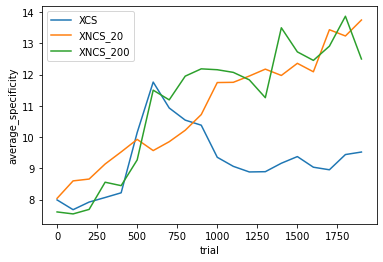

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_20","average_specificity_200"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS_20","XNCS_200"])

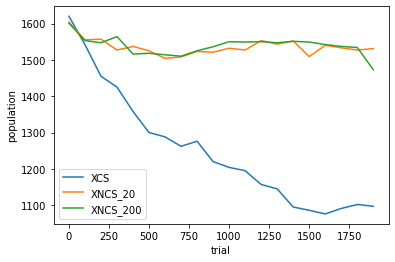

In [7]:
ax = df[['population', "population_20", "population_200"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS_20","XNCS_200"])

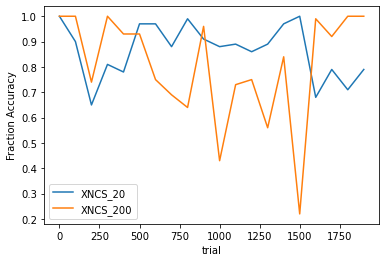

In [11]:
ax = df[['fraction_accuracy_20', 'fraction_accuracy_200']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Fraction Accuracy")
ax.legend(["XNCS_20","XNCS_200"])

In [ ]:
ax = df[['numerosity_20', 'numerosity_200']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["XCS","XNCS_20","XNCS_200"])

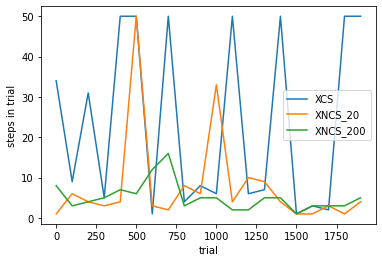

In [9]:
ax = df[['steps_in_trial', 'steps_in_trial_20', 'steps_in_trial_200']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS_20","XNCS_200"])

In [10]:
print(sum(df['steps_in_trial'])/number_of_experiments)
print(sum(df['steps_in_trial_20'])/number_of_experiments)
print(sum(df['steps_in_trial_200'])/number_of_experiments)

467.0
157.0
103.0
